In [1]:
from fromscratchtoml.decomposition import Decomposition
from fromscratchtoml.toolbox import binary_visualize

import numpy as np

# set this to avoid exponential notations
np.set_printoptions(suppress=True)
%matplotlib inline

# Data decomposition techniques

In [2]:
n = 10
n_dim = 3
nc = 3

X = np.zeros([n, n_dim])
for i in range(n):
    X[i,2] = i
    X[i,1] = 5*i + 2
#     X[i,1] = pow(i,2)
    X[i,0] = (5 - 2*X[i,0] - 3*X[i,1])/2

In [3]:
X

array([[ -0.5,   2. ,   0. ],
       [ -8. ,   7. ,   1. ],
       [-15.5,  12. ,   2. ],
       [-23. ,  17. ,   3. ],
       [-30.5,  22. ,   4. ],
       [-38. ,  27. ,   5. ],
       [-45.5,  32. ,   6. ],
       [-53. ,  37. ,   7. ],
       [-60.5,  42. ,   8. ],
       [-68. ,  47. ,   9. ]])

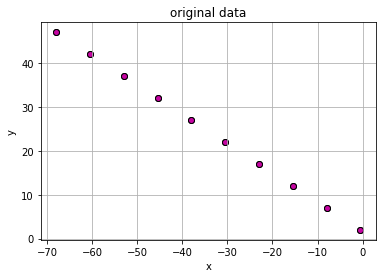

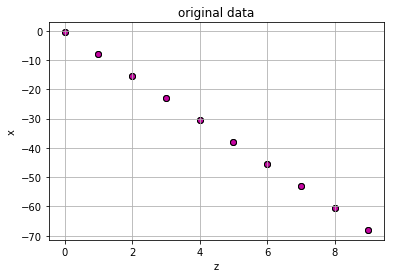

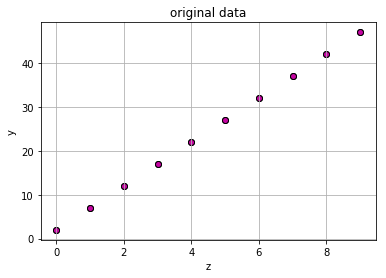

In [4]:
xy = np.vstack([X[:, 0], X[:, 1]]).T
binary_visualize(xy, xlabel="x", title="original data",
                     ylabel="y")

zx = np.vstack([X[:, 2], X[:, 0]]).T
binary_visualize(zx, xlabel="z", title="original data",
                     ylabel="x")

zy = np.vstack([X[:, 2], X[:, 1]]).T
binary_visualize(zy, xlabel="z", title="original data",
                     ylabel="y")

In [5]:
principal_components, scaled_X = Decomposition.pca(X, num_components=nc, return_scaled=True)

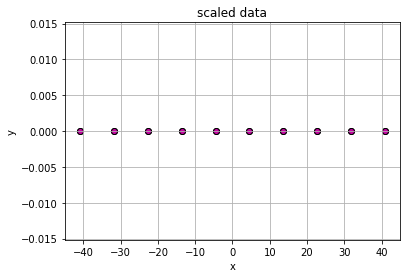

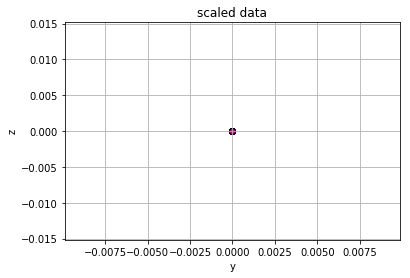

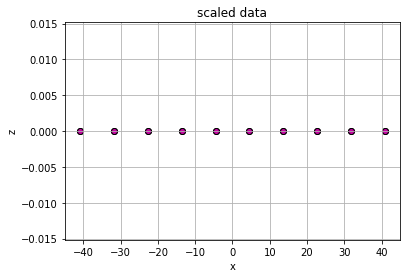

In [6]:
xy = np.vstack([scaled_X[:, 0], scaled_X[:, 1]]).T
binary_visualize(xy, xlabel="x", title="scaled data",
                     ylabel="y")
yz = np.vstack([scaled_X[:, 1], scaled_X[:, 2]]).T
binary_visualize(yz, xlabel="y", title="scaled data",
                     ylabel="z")
xz = np.vstack([scaled_X[:, 0], scaled_X[:, 2]]).T
binary_visualize(xz, xlabel="x", title="scaled data",
                     ylabel="z")

In [7]:
principal_components

array([[ 0.82697677, -0.56223609, -0.54648163],
       [-0.55131785, -0.81091744, -0.83429529],
       [-0.11026357, -0.16218349,  0.07286422]])

In [8]:
scaled_X

array([[ 40.81130358,   0.        ,   0.        ],
       [ 31.74212501,   0.        ,   0.        ],
       [ 22.67294643,  -0.        ,   0.        ],
       [ 13.60376786,   0.        ,   0.        ],
       [  4.53458929,   0.        ,   0.        ],
       [ -4.53458929,  -0.        ,  -0.        ],
       [-13.60376786,  -0.        ,  -0.        ],
       [-22.67294643,   0.        ,  -0.        ],
       [-31.74212501,  -0.        ,  -0.        ],
       [-40.81130358,  -0.        ,  -0.        ]])

In [9]:
reconstructed_x = np.dot(scaled_X, principal_components.T) + X.mean(axis=0)
print(reconstructed_x)

[[ -0.5   2.    0. ]
 [ -8.    7.    1. ]
 [-15.5  12.    2. ]
 [-23.   17.    3. ]
 [-30.5  22.    4. ]
 [-38.   27.    5. ]
 [-45.5  32.    6. ]
 [-53.   37.    7. ]
 [-60.5  42.    8. ]
 [-68.   47.    9. ]]


In [10]:
np.allclose(X, reconstructed_x)

True